# Group 9 Project Code
## Big Data Analytics - Spring 2024  
This is our implementation of the CNN with the best F1-score from [CIFAKE Paper](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=10409290)  
In order to run this notebook, download the [CIFAKE dataset](https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images).

### First, we load in the data.  
The CIFAKE dataset comes with 100,000 training images and 20,000 testing images.  
From the training images, we set 20% of them (20,000 images) aside for validation during training.

In [230]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# load in training data
train_data, val_data = tf.keras.utils.image_dataset_from_directory(
    "all-dataset/train",               # path to training images
    image_size = (32,32),       # size of images in that path
    color_mode="rgb",           # format color is stored in
    label_mode='binary',        # store the labels as 0 for FAKE or 1 for REAL
    validation_split = 0.2,     # set aside 20% of training data for validation
    subset = "both",            # return a tuple of two datasets (training, validation)       
    seed = 1                    # seed needed for randomly splitting the data 
)


# load in testing data
test_data = tf.keras.utils.image_dataset_from_directory(
    'all-dataset/test/',           # path to testing data
    image_size = (32,32),   # size of images in that path
    color_mode="rgb",       # format color is stored in
    label_mode='binary'     # store the labels as 0 for FAKE or 1 for REAL
)

Found 161658 files belonging to 2 classes.
Using 129327 files for training.
Using 32331 files for validation.
Found 57249 files belonging to 2 classes.


#### (Optional) Visualize Data  
We can plot a few examples to check images were loaded correctly.  

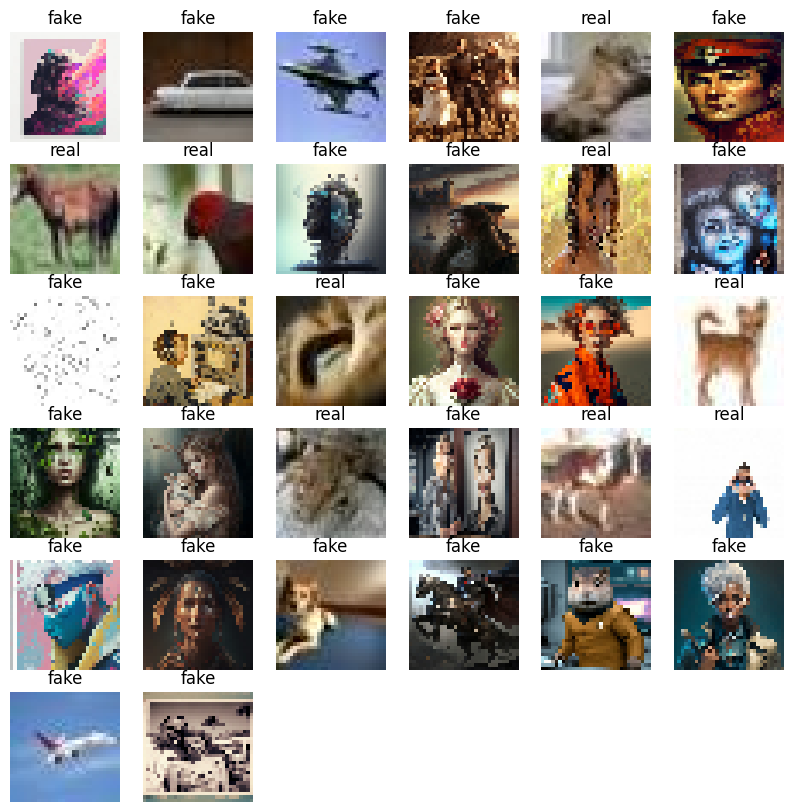

In [231]:
# plot some examples from train data

# size of figure
plt.figure(figsize=(10, 10))

# classes = REAL or FAKE
classes = train_data.class_names

# this plots 32 random images with their label printed above
for images, labels in test_data.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("int"))
        plt.title(classes[labels[i].numpy()[0].astype("int")])
        plt.axis("off")

### Second, we build the CNN model  
Figure 5 on the 8th page of the CIFAKE paper shows a visual representation of this model.  

In [232]:
# we need this line when testing different models
tf.keras.backend.clear_session()

# build the model
model = models.Sequential()

# 1st layer - Conv2D (32 x ReLu)
model.add(layers.Conv2D(32, (3, 3), strides=1, activation='relu', input_shape=(32, 32, 3))) 

# 2nd layer - Max Pool
model.add(layers.MaxPooling2D((2, 2), strides=1))    

# 3rd layer - Conv2D (32 x ReLu)
model.add(layers.Conv2D(32, (3, 3), strides=1, activation='relu'))

# 4th layer - Max Pool
model.add(layers.MaxPooling2D((2, 2), strides=1))

# 5th layer - Flatten
model.add(layers.Flatten())

# 6th layer - Dense (64 x ReLu)
model.add(layers.Dense(64, activation='relu'))

# 7th layer - Dense (Sigmoid)
model.add(layers.Dense(1, activation='sigmoid'))

# this line will display a summary of the model's layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 29, 29, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 26, 26, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 64)                1

### Third, we compile and train the model

In [233]:
# IMPORTANT: if running this block multiple times, run above block first (i.e. you need to clear session)
# compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0003),     # Adam optimizer is stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments
              loss=tf.keras.losses.BinaryCrossentropy(),                    # loss function to be minimized (Binary Cross-entropy)
              metrics=[tf.keras.metrics.F1Score()])                         # performance metrics (F1-score)

# this line is used for optimizing the number of epochs used in training
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',           # stop training when the validation loss does not improve
                                              patience=5,                   # give the model 5 epochs to improve
                                              restore_best_weights=True)    # save the weights that produced the minimum validation loss

# train the model
trained_model = model.fit(train_data,                 # training dataset  
                          validation_data=val_data,   # validation dataset
                          epochs=100,                 # maximum number of epochs
                          #batch_size=512,             # batch size
                          callbacks = [stop_early])   # early stopping

Epoch 1/100
4042/4042 [==============================] - 277s 68ms/step - loss: 0.5620 - f1_score: 0.5607 - val_loss: 0.3541 - val_f1_score: 0.5631
Epoch 2/100
4042/4042 [==============================] - 277s 69ms/step - loss: 0.3532 - f1_score: 0.5608 - val_loss: 0.4439 - val_f1_score: 0.5621
Epoch 3/100
4042/4042 [==============================] - 269s 67ms/step - loss: 0.2973 - f1_score: 0.5604 - val_loss: 0.2744 - val_f1_score: 0.5621
Epoch 4/100
4042/4042 [==============================] - 269s 66ms/step - loss: 0.2774 - f1_score: 0.5612 - val_loss: 0.2846 - val_f1_score: 0.5626
Epoch 5/100
4042/4042 [==============================] - 274s 68ms/step - loss: 0.2644 - f1_score: 0.5609 - val_loss: 0.2599 - val_f1_score: 0.5635
Epoch 6/100
4042/4042 [==============================] - 274s 68ms/step - loss: 0.2585 - f1_score: 0.5613 - val_loss: 0.2675 - val_f1_score: 0.5624
Epoch 7/100
4042/4042 [==============================] - 274s 68ms/step - loss: 0.2501 - f1_score: 0.5614 - val_

#### Visualize the model's performance during training

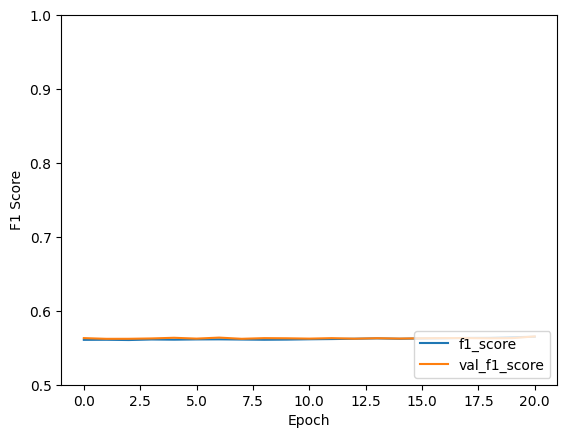

In [234]:
# plot the F1-score of the training and validation set 
plt.plot(trained_model.history['f1_score'], label='f1_score')
plt.plot(trained_model.history['val_f1_score'], label = 'val_f1_score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

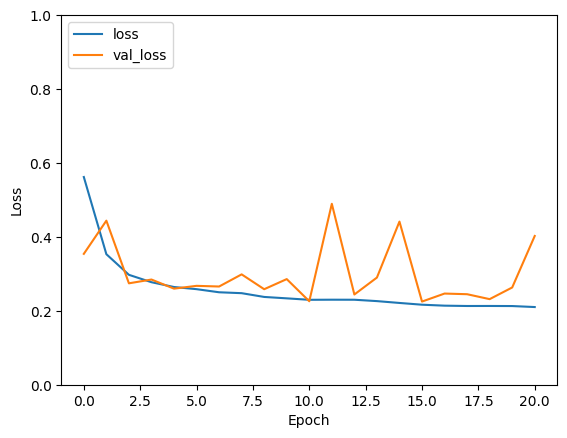

In [235]:
# plot the F1-score of the training and validation set 
plt.plot(trained_model.history['loss'], label='loss')
plt.plot(trained_model.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper left')


### Finally, Evaluate the model

In [236]:
test_loss, test_f1 = model.evaluate(test_data)
print(f'    Loss on the test data = {test_loss}')
print(f'F1-Score on the test data = {float(test_f1)}')

1790/1790 [==============================] - 59s 33ms/step - loss: 0.2011 - f1_score: 0.4405
    Loss on the test data = 0.20113298296928406
F1-Score on the test data = 0.4405063986778259
